# Where to focus a marketing campaign? 
 Created by Angel Hernandez


## 📖 Background
You are a data analyst at a crowdfunding site. For the next quarter, your company will be running a marketing campaign. The marketing manager wants to target those segments that have donated the most in the past year. She turned to you to help her with her upcoming meeting with the CEO.

![crowdfunding.jpg](BestCrowdfundingSites_resized-03.jpg)

# Contents

1. Objective

2. Highest-Earning Categories

3. Most Contributions by Device Type

4. Most Contributions by Age Group

5. Conbined Visualization (Treemap)

## Objective
To target the segments that have donated most in order to run a successful marketing campaign. Thus we seek to create a single visualization that can answer these three questions:
1. What are the top three categories in terms of total donations? 
2. What device type has historically provided the most contributions? 
3. What age bracket should the campaign target?


## Final Summary
Overall, we saw that Games, Sports, and Technology were the highest contributing categories. However, **for 18-24 year old iOS users, Games, Environment, and Fashon were the highest-earning segments. Therefore, these would be the best sectors to target for a marketing campaign.** Visualization is provided below.

The columns in our dataset are as follows:

#### Historic crowdfunding donations
- "category" - "Sports", "Fashion", "Technology", etc.
- "device" - the type of device used.
- "gender" - gender of the user.
- "age range" - one of five age brackets.
- "amount" - how much the user donated in Euros.

Now, we import and take a look at the data:

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_context('notebook')
df = pd.read_csv('./data/crowdfunding.csv')
df.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0


Before we begin, we want to make sure our dataset contains no missing values:

In [ ]:
df.isna().sum()

category    0
device      0
gender      0
age         0
amount      0
dtype: int64

## Highest-Earning Categories 
Now, we take a look at which categories donated the most as a whole:

category
Games          165483.0
Sports         163528.0
Technology     162731.0
Environment    162376.0
Fashion        159952.0
Name: amount, dtype: float64


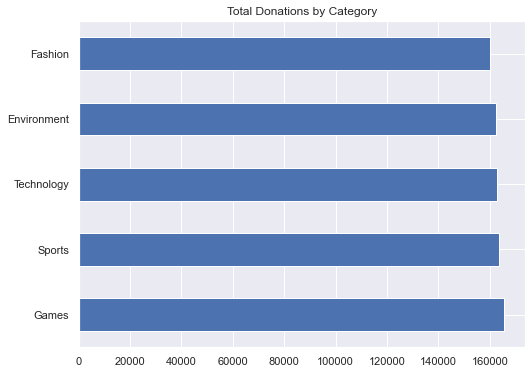

In [ ]:
biggest_cats = df.groupby('category')['amount'].sum().sort_values(ascending=False)
print(biggest_cats)
plt.subplots(figsize = (8,6))
biggest_cats.plot(kind='barh', xlabel='', ylabel='Amount($)', title='Total Donations by Category')
plt.show()

The categories all have very similar total donations, but we see that **Games, Sports, and Technology are the top three**, in that order. 

## Most Contributions by Device Type
Now we need to see if more contributions came from iOS or Andriod users:

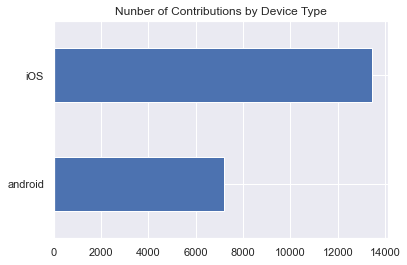

In [ ]:
device_counts = df.groupby('device')['device'].count()

plt.subplots(figsize = (6,4))
device_counts.plot(kind='barh',xlabel='',title='Nunber of Contributions by Device Type')
plt.show()

The graph shows us that **iOS users made almost twice as many contributions** as Andriod users, making this segment more important to market to. 

## Most Contributions by Age Group
The last segment we must examine is the contributions for each age range.

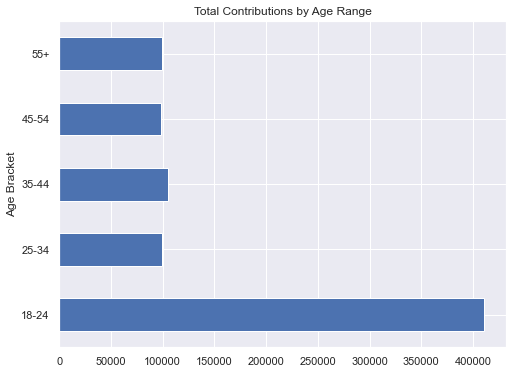

In [ ]:
age_totals = df.groupby('age')['amount'].sum()

plt.subplots(figsize = (8,6))
age_totals.plot(kind='barh',title='Total Contributions by Age Range', xlabel='Age Bracket', ylabel='Amount($)')
plt.show()

Here, we see that **18-24 year olds contributed almost four times as much as the other age ranges.** This makes them the most important age group to target in our campaign. 

## Conbined Visualization
We can now create a single visualization that shows all of our findings:

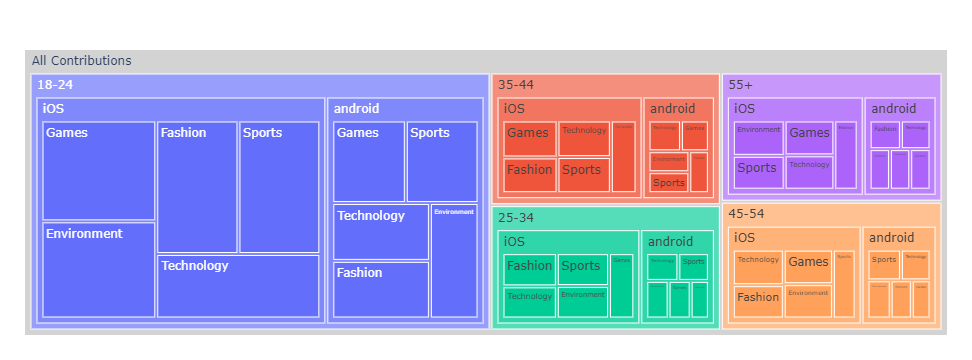

In [ ]:
fig = px.treemap(df, path=[px.Constant("All Contributions"), 'age', 'device', 'category'], values='amount')
fig.update_traces(root_color="lightgray")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

This treemap conveniently answers all our questions for the marketing campaign. The size of the boxes indicate contribution amounts, so we quickly see that 18-24 year old iOS users make up the largest share of age/device combinations. 

Overall, we saw that Games, Sports, and Technology were the highest contributing categories. However, **for 18-24 year old iOS users, Games, Environment, and Fashon were the highest-earning segments. Therefore, these would be the best sectors to target for a marketing campaign.**